In [133]:
import torch

In [134]:
A = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
])

In [135]:
A

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [136]:
X = torch.tensor([
    [1.0, 4.0, 7.0],
     [2.0, 3.0, 6.0]
], dtype=torch.bfloat16)

In [137]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [138]:
X.shape

torch.Size([2, 3])

In [139]:
X.dtype

torch.bfloat16

In [140]:
X[0, 1]

tensor(4., dtype=torch.bfloat16)

In [141]:
X[:, 1]

tensor([4., 3.], dtype=torch.bfloat16)

In [142]:
X.abs()

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [143]:
torch.abs(X)

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [144]:
# torch.cos(), torch.exp(), torch.max(), torch.mean(), torch.sqrt()

In [145]:
X.sqrt()

tensor([[1.0000, 2.0000, 2.6406],
        [1.4141, 1.7344, 2.4531]], dtype=torch.bfloat16)

In [146]:
10 * (X + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]], dtype=torch.bfloat16)

In [147]:
X.exp()

tensor([[   2.7188,   54.5000, 1096.0000],
        [   7.3750,   20.1250,  404.0000]], dtype=torch.bfloat16)

In [148]:
X.mean()

tensor(3.8281, dtype=torch.bfloat16)

In [149]:
X.max(dim=0) #, keepdim=True

torch.return_types.max(
values=tensor([2., 4., 7.], dtype=torch.bfloat16),
indices=tensor([1, 0, 0]))

In [150]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [151]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]], dtype=torch.bfloat16)

In [152]:
import numpy as np

In [153]:
A.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [154]:
torch.tensor(np.array([[1., 4., 7.],
                      [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [155]:
# It’s generally better to use 32 bits in deep learning because this takes half the RAM and speeds up computations,
# and neural nets do not actually need the extra precision offered by 64-bit floats.

In [156]:
N = torch.FloatTensor(np.array([            # automatically converts the array to 32 bits
                            [1., 4., 7.],
                            [2., 3., 6 ]
                              ]))
N

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [157]:
N.dtype

torch.float32

In [158]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [159]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [160]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [161]:
X.relu_()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [162]:
X    # _ changed in place

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [163]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [164]:
device

'cuda'

In [165]:
!nvidia-smi   # watch -n 1 nvidia-smi

Thu Feb  5 15:47:52 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             34W /   70W |     178MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [166]:
M = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
])
M = M.to(device)

In [167]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [168]:
M.device

device(type='cuda', index=0)

In [169]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [170]:
R = M @ M.T

In [171]:
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [172]:
M = torch.rand((1000, 1000))  # on the CPU
%timeit M @ M.T


M = torch.rand((1000, 1000), device="cuda")  # on the GPU
%timeit M @ M.T

# now try 100 by 100 :D

23.5 ms ± 662 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
694 µs ± 16.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [173]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [174]:
f.backward()
x.grad

tensor(10.)

In [175]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [176]:
x

tensor(4., requires_grad=True)

In [177]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad   # detach yaddashda eyni yerdedi

In [178]:
x_detached

tensor(3.)

In [179]:
x.grad.zero_()

tensor(0.)

In [180]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    print(x)
    # print(x.grad)
    x.grad.zero_()  # reset the gradients

tensor(4., requires_grad=True)
tensor(3.2000, requires_grad=True)
tensor(2.5600, requires_grad=True)
tensor(2.0480, requires_grad=True)
tensor(1.6384, requires_grad=True)
tensor(1.3107, requires_grad=True)
tensor(1.0486, requires_grad=True)
tensor(0.8389, requires_grad=True)
tensor(0.6711, requires_grad=True)
tensor(0.5369, requires_grad=True)
tensor(0.4295, requires_grad=True)
tensor(0.3436, requires_grad=True)
tensor(0.2749, requires_grad=True)
tensor(0.2199, requires_grad=True)
tensor(0.1759, requires_grad=True)
tensor(0.1407, requires_grad=True)
tensor(0.1126, requires_grad=True)
tensor(0.0901, requires_grad=True)
tensor(0.0721, requires_grad=True)
tensor(0.0576, requires_grad=True)
tensor(0.0461, requires_grad=True)
tensor(0.0369, requires_grad=True)
tensor(0.0295, requires_grad=True)
tensor(0.0236, requires_grad=True)
tensor(0.0189, requires_grad=True)
tensor(0.0151, requires_grad=True)
tensor(0.0121, requires_grad=True)
tensor(0.0097, requires_grad=True)
tensor(0.0077, requires_

In [181]:
t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z += 1  # this is an in-place operation
z.backward()  #  RuntimeError!

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor []], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [182]:
# but

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z = z + 1  # new tensor created, and previous saved for computation graph
z.backward()

# make sure you don’t modify in place a tensor needed for backprop

In [183]:
import sklearn

In [184]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [185]:
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [186]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_full, y_train_full, test_size=0.2)

In [187]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [188]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

In [189]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)


In [190]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [191]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
  y_pred = X_train @ w + b
  loss = ((y_pred - y_train) ** 2).mean()
  loss.backward()
  with torch.no_grad():
    b -= learning_rate * b.grad
    w -= learning_rate * w.grad
    b.grad.zero_()
    w.grad.zero_()
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')



Epoch 1/20, Loss: 16.151897430419922
Epoch 2/20, Loss: 4.819143295288086
Epoch 3/20, Loss: 2.197099208831787
Epoch 4/20, Loss: 1.2906502485275269
Epoch 5/20, Loss: 0.9431548714637756
Epoch 6/20, Loss: 0.7988792061805725
Epoch 7/20, Loss: 0.7316145896911621
Epoch 8/20, Loss: 0.6947812438011169
Epoch 9/20, Loss: 0.670779287815094
Epoch 10/20, Loss: 0.6527988910675049
Epoch 11/20, Loss: 0.6381124258041382
Epoch 12/20, Loss: 0.6255598068237305
Epoch 13/20, Loss: 0.6145941019058228
Epoch 14/20, Loss: 0.604915976524353
Epoch 15/20, Loss: 0.5963318943977356
Epoch 16/20, Loss: 0.5886985659599304
Epoch 17/20, Loss: 0.5818999409675598
Epoch 18/20, Loss: 0.5758382081985474
Epoch 19/20, Loss: 0.5704282522201538
Epoch 20/20, Loss: 0.5655960440635681


In [192]:
X_new = X_test[:3]
with torch.no_grad():
  y_pred = X_new @ w + b

y_pred

tensor([[1.6390],
        [1.5931],
        [2.1773]])

In [193]:
y_test[:3]

tensor([[2.2670],
        [1.1390],
        [2.3650]])

In [194]:
import torch.nn as nn

In [195]:
torch.manual_seed(42)
model = nn.Linear(in_features = n_features, out_features=1)

In [196]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [197]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [198]:
model.parameters()

<generator object Module.parameters at 0x7bdabe46f300>

In [199]:
next(model.parameters())

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [200]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [201]:
for name, param in model.named_parameters():
  print(f'{name} | {param}')

weight | Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
bias | Parameter containing:
tensor([0.3117], requires_grad=True)


In [202]:
model(X_train[:2])

tensor([[0.3336],
        [0.6051]], grad_fn=<AddmmBackward0>)

In [203]:
y_train[:2]

tensor([[2.5290],
        [1.6600]])

In [204]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [205]:
model(X_train[:2])

tensor([[0.3336],
        [0.6051]], grad_fn=<AddmmBackward0>)

In [206]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

In [207]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.249592304229736
Epoch 2/20, Loss: 0.7688589692115784
Epoch 3/20, Loss: 0.6196486353874207
Epoch 4/20, Loss: 0.6014643907546997
Epoch 5/20, Loss: 0.5914400219917297
Epoch 6/20, Loss: 0.583347737789154
Epoch 7/20, Loss: 0.5764079093933105
Epoch 8/20, Loss: 0.5703453421592712
Epoch 9/20, Loss: 0.5650089383125305
Epoch 10/20, Loss: 0.5602954626083374
Epoch 11/20, Loss: 0.5561248064041138
Epoch 12/20, Loss: 0.5524302124977112
Epoch 13/20, Loss: 0.5491545796394348
Epoch 14/20, Loss: 0.546248197555542
Epoch 15/20, Loss: 0.5436676740646362
Epoch 16/20, Loss: 0.5413748621940613
Epoch 17/20, Loss: 0.5393362045288086
Epoch 18/20, Loss: 0.5375222563743591
Epoch 19/20, Loss: 0.5359070301055908
Epoch 20/20, Loss: 0.5344676375389099


In [208]:
X_new = X_test[:3]

with torch.no_grad():
  y_pred = model(X_new)

y_pred

tensor([[1.7101],
        [1.4953],
        [2.2942]])

In [209]:
y_test[:3]

tensor([[2.2670],
        [1.1390],
        [2.3650]])

In [210]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features,50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [211]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.965452194213867
Epoch 2/20, Loss: 2.0459985733032227
Epoch 3/20, Loss: 1.0035094022750854
Epoch 4/20, Loss: 0.8615914583206177
Epoch 5/20, Loss: 0.7811700105667114
Epoch 6/20, Loss: 0.7314165234565735
Epoch 7/20, Loss: 0.6995190382003784
Epoch 8/20, Loss: 0.6780936121940613
Epoch 9/20, Loss: 0.6628413200378418
Epoch 10/20, Loss: 0.6512534022331238
Epoch 11/20, Loss: 0.6418545842170715
Epoch 12/20, Loss: 0.6337348222732544
Epoch 13/20, Loss: 0.6264376640319824
Epoch 14/20, Loss: 0.6196886897087097
Epoch 15/20, Loss: 0.6133348345756531
Epoch 16/20, Loss: 0.6072749495506287
Epoch 17/20, Loss: 0.6014364361763
Epoch 18/20, Loss: 0.5958037972450256
Epoch 19/20, Loss: 0.5903418064117432
Epoch 20/20, Loss: 0.5850344896316528


# Making it MiniBatches

In [212]:
from torch.utils.data import TensorDataset, DataLoader

In [213]:
train_dataset = TensorDataset(X_train, y_train)

In [214]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [215]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features = n_features, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(in_features = 32, out_features = 1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [216]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [217]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  model.train()
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [218]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:0.6531
Epoch 2/20, Loss:0.4048
Epoch 3/20, Loss:0.3830
Epoch 4/20, Loss:0.3744
Epoch 5/20, Loss:0.3619
Epoch 6/20, Loss:0.3522
Epoch 7/20, Loss:0.3440
Epoch 8/20, Loss:0.3361
Epoch 9/20, Loss:0.3312
Epoch 10/20, Loss:0.3287
Epoch 11/20, Loss:0.3235
Epoch 12/20, Loss:0.3177
Epoch 13/20, Loss:0.3142
Epoch 14/20, Loss:0.3118
Epoch 15/20, Loss:0.3073
Epoch 16/20, Loss:0.3069
Epoch 17/20, Loss:0.3006
Epoch 18/20, Loss:0.2997
Epoch 19/20, Loss:0.2980
Epoch 20/20, Loss:0.2988


In [219]:
import torch
print(torch.cuda.is_available())


True


In [220]:
# LET'S EVALUATE our model

def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
  model.eval()
  metrics=[]
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric = metric_fn(y_pred, y_batch)
      metrics.append(metric)
  return aggregate_fn(torch.stack(metrics))


In [221]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.3270, device='cuda:0')

In [222]:
def rmse(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean().sqrt()

In [223]:
evaluate(model, valid_loader, rmse)


tensor(0.5570, device='cuda:0')

In [224]:
0.3149 ** 0.5 != 0.5497

True

The reason is that instead of calculating the RMSE over the whole validation set, we computed it over each batch and then computed the mean of all these batch RMSEs

In [225]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5718, device='cuda:0')

In [226]:
0.3149 ** 0.5

0.561159513863928

In [227]:
%pip install torchmetrics

In [228]:
import torchmetrics

In [229]:
def evaluate_tm(model, data_loader, metric):
  model.eval()
  metric.reset()
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric.update(y_pred, y_batch)
  return metric.compute()

In [230]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5732, device='cuda:0')

# Deep and Wide Networks

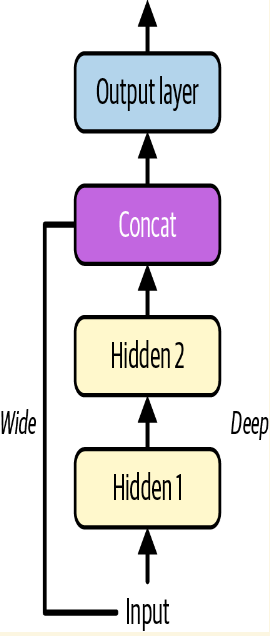

In [231]:
class WideAndDeep(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(n_features, 50),
        nn.ReLU(),
        nn.Linear(50, 40),
        nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + n_features, 1)

  def forward(self, X):
    deep_output = self.deep_stack(X)
    wide_and_deep = torch.concat([X, deep_output], dim=1)
    return self.output_layer(wide_and_deep)

In [232]:
[i for i in WideAndDeep(8).children()]

[Sequential(
   (0): Linear(in_features=8, out_features=50, bias=True)
   (1): ReLU()
   (2): Linear(in_features=50, out_features=40, bias=True)
   (3): ReLU()
 ),
 Linear(in_features=48, out_features=1, bias=True)]

In [233]:
[i for i in WideAndDeep(8).named_children()]

[('deep_stack',
  Sequential(
    (0): Linear(in_features=8, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )),
 ('output_layer', Linear(in_features=48, out_features=1, bias=True))]

In [234]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3193
Epoch 2/20, Loss:0.6147
Epoch 3/20, Loss:0.5696
Epoch 4/20, Loss:0.5343
Epoch 5/20, Loss:0.5124
Epoch 6/20, Loss:0.4907
Epoch 7/20, Loss:0.4750
Epoch 8/20, Loss:0.4624
Epoch 9/20, Loss:0.4506
Epoch 10/20, Loss:0.4420
Epoch 11/20, Loss:0.4321
Epoch 12/20, Loss:0.4253
Epoch 13/20, Loss:0.4169
Epoch 14/20, Loss:0.4110
Epoch 15/20, Loss:0.4043
Epoch 16/20, Loss:0.3989
Epoch 17/20, Loss:0.3936
Epoch 18/20, Loss:0.3895
Epoch 19/20, Loss:0.3841
Epoch 20/20, Loss:0.3804


In [235]:
class WideAndDeepV2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide


  def forward(self, X):
    X_wide = X[:, :5]
    X_deep = X[:, 2:]

    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)


In [236]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3867
Epoch 2/20, Loss:0.6022
Epoch 3/20, Loss:0.5458
Epoch 4/20, Loss:0.5119
Epoch 5/20, Loss:0.4896
Epoch 6/20, Loss:0.4725
Epoch 7/20, Loss:0.4610
Epoch 8/20, Loss:0.4522
Epoch 9/20, Loss:0.4447
Epoch 10/20, Loss:0.4386
Epoch 11/20, Loss:0.4329
Epoch 12/20, Loss:0.4287
Epoch 13/20, Loss:0.4253
Epoch 14/20, Loss:0.4222
Epoch 15/20, Loss:0.4194
Epoch 16/20, Loss:0.4171
Epoch 17/20, Loss:0.4146
Epoch 18/20, Loss:0.4133
Epoch 19/20, Loss:0.4110
Epoch 20/20, Loss:0.4095


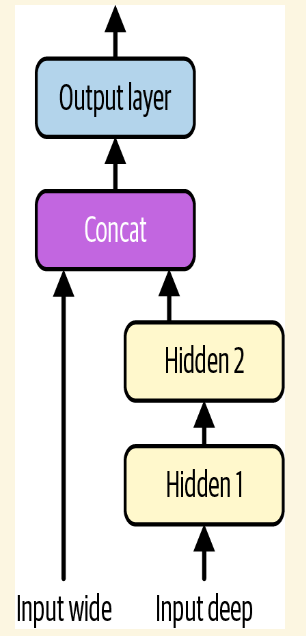

In [237]:
class WideAndDeepV3(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [238]:
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32, shuffle=True)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32, shuffle=True)

In [239]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch_wide, X_batch_deep, y_batch in train_loader:
      X_batch_wide, X_batch_deep, y_batch = X_batch_wide.to(device), X_batch_deep.to(device), y_batch.to(device)
      y_pred = model(X_batch_wide, X_batch_deep)
      loss = criterion(y_pred, y_batch)
      total_loss = total_loss + loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')


In [240]:
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader_wd, n_epochs)

Epoch 1/20, Loss:1.3867
Epoch 2/20, Loss:0.6022
Epoch 3/20, Loss:0.5458
Epoch 4/20, Loss:0.5119
Epoch 5/20, Loss:0.4896
Epoch 6/20, Loss:0.4725
Epoch 7/20, Loss:0.4610
Epoch 8/20, Loss:0.4522
Epoch 9/20, Loss:0.4447
Epoch 10/20, Loss:0.4386
Epoch 11/20, Loss:0.4329
Epoch 12/20, Loss:0.4287
Epoch 13/20, Loss:0.4253
Epoch 14/20, Loss:0.4222
Epoch 15/20, Loss:0.4194
Epoch 16/20, Loss:0.4171
Epoch 17/20, Loss:0.4146
Epoch 18/20, Loss:0.4133
Epoch 19/20, Loss:0.4110
Epoch 20/20, Loss:0.4095


In [241]:
class WideAndDeepDataset(torch.utils.data.Dataset):
  def __init__(self, X_wide, X_deep, y):
    self.X_wide = X_wide
    self.X_deep = X_deep
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
    return input_dict, self.y[idx]


In [242]:
train_data_named = WideAndDeepDataset(X_wide = X_train[:, :5], X_deep = X_train[:, 2:], y=y_train)
valid_data_named = WideAndDeepDataset(X_wide = X_valid[:, :5], X_deep = X_valid[:, 2:], y=y_valid)
test_data_named = WideAndDeepDataset(X_wide = X_test[:, :5], X_deep = X_test[:, 2:], y=y_test)

train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [243]:
import matplotlib.pyplot as plt

In [244]:
def train(model, optimizer, criterion, train_loader, n_epochs, plot_loss=False):
  losses = []
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      inputs = {name: X.to(device) for name, X in inputs.items()}
      y_batch = y_batch.to(device)
      y_pred = model(X_wide=inputs['X_wide'], X_deep=inputs['X_deep'])
      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

  if plot_loss:
    plt.figure(figsize=(8, 5))
    plt.title('Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(n_epochs),losses);



In [245]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [246]:
model = model.to(device)

Epoch 1/20, Loss: 0.25506940484046936
Epoch 2/20, Loss: 0.2712405323982239
Epoch 3/20, Loss: 0.4087156653404236
Epoch 4/20, Loss: 1.331757664680481
Epoch 5/20, Loss: 0.3645986020565033
Epoch 6/20, Loss: 0.7959323525428772
Epoch 7/20, Loss: 0.5507471561431885
Epoch 8/20, Loss: 0.18170081079006195
Epoch 9/20, Loss: 0.11856871098279953
Epoch 10/20, Loss: 0.4594446122646332
Epoch 11/20, Loss: 0.15714767575263977
Epoch 12/20, Loss: 0.29446521401405334
Epoch 13/20, Loss: 0.12547072768211365
Epoch 14/20, Loss: 0.48370039463043213
Epoch 15/20, Loss: 0.400652676820755
Epoch 16/20, Loss: 0.22657136619091034
Epoch 17/20, Loss: 0.7845790982246399
Epoch 18/20, Loss: 0.6830245852470398
Epoch 19/20, Loss: 0.5721604228019714
Epoch 20/20, Loss: 0.4056917428970337


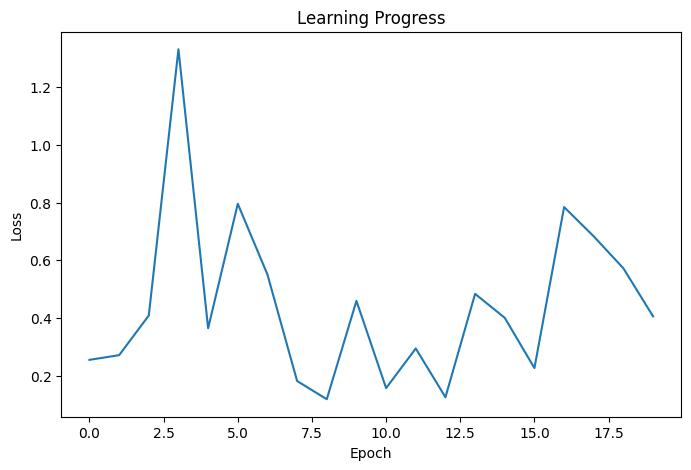

In [247]:
train(model, optimizer, mse, train_loader_named, 20, True)

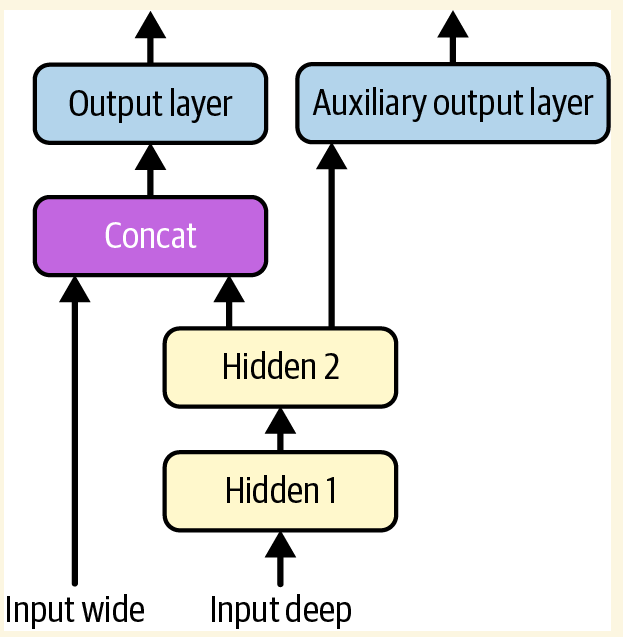

In [248]:
class WideAndDeepV4(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(6, 50), nn.ReLU(),
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)
    self.aux_output_layer = nn.Linear(40, 1)

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    concat = torch.concat([X_wide, deep_output], dim=1)
    main_output = self.output_layer(concat)
    aux_output = self.aux_output_layer(deep_output)

    return main_output, aux_output


In [249]:
model = WideAndDeepV4(n_features)

In [250]:
model

WideAndDeepV4(
  (deep_stack): Sequential(
    (0): Linear(in_features=6, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )
  (output_layer): Linear(in_features=45, out_features=1, bias=True)
  (aux_output_layer): Linear(in_features=40, out_features=1, bias=True)
)

In [251]:
!pip install torchviz graphviz


In [252]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      y_pred, y_pred_aux = model(**inputs)
      main_loss = criterion(y_pred, y_batch)
      aux_loss = criterion(y_pred_aux, y_batch)
      loss = 0.8 * main_loss + 0.2 * aux_loss

      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

In [253]:
lr = 0.005
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
mse = nn.MSELoss()

In [254]:
train(model, optimizer, mse, train_loader_named, 20)

Epoch 1/20, Loss: 0.5132201910018921
Epoch 2/20, Loss: 0.8114078044891357
Epoch 3/20, Loss: 0.6766020655632019
Epoch 4/20, Loss: 0.7815596461296082
Epoch 5/20, Loss: 1.0421254634857178
Epoch 6/20, Loss: 0.4025798439979553
Epoch 7/20, Loss: 0.730309247970581
Epoch 8/20, Loss: 0.2232060432434082
Epoch 9/20, Loss: 0.5230737924575806
Epoch 10/20, Loss: 0.3259170353412628
Epoch 11/20, Loss: 0.342273086309433
Epoch 12/20, Loss: 0.6614346504211426
Epoch 13/20, Loss: 0.28201353549957275
Epoch 14/20, Loss: 0.6860233545303345
Epoch 15/20, Loss: 0.5350707769393921
Epoch 16/20, Loss: 0.33334505558013916
Epoch 17/20, Loss: 0.27682414650917053
Epoch 18/20, Loss: 0.4886648952960968
Epoch 19/20, Loss: 0.39912039041519165
Epoch 20/20, Loss: 0.19906729459762573


In [255]:
X_wide_graph = [i for i in train_loader_named][:1][0][0]['X_wide']
X_deep_graph = [i for i in train_loader_named][:1][0][0]['X_deep']

In [257]:
import torch
from torchviz import make_dot
import torchvision.models as models

In [258]:
model.eval()

batch_size = 1
X_wide = torch.zeros(batch_size, 5)
X_deep = torch.zeros(batch_size, 6)

y_pred, y_aux = model(X_wide, X_deep)

dot = make_dot(
    (y_pred + y_aux).sum(),
    params=dict(model.named_parameters())
)

dot.format = "png"
dot.render("wide_and_deep_graph")


'wide_and_deep_graph.png'

# Let's do some VISION👁

In [259]:
import torchvision
import torchvision.transforms.v2 as T

In [260]:
toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

In [261]:
train_and_valid_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root='datasets', train=False, download=True, transform=toTensor)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 188kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]


In [262]:
torch.manual_seed(42)

In [263]:
train_data, valid_data = torch.utils.data.random_split(train_and_valid_data,
                                                       [55_000, 5_000])

In [264]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

In [265]:
X_sample, y_sample = train_data[0]

In [266]:
X_sample.shape

torch.Size([1, 28, 28])

In [267]:
X_sample.dtype

torch.float32

In [268]:
train_and_valid_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [269]:
class ImageClassifier(nn.Module):
  def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_inputs, n_hidden1),
        nn.ReLU(),
        nn.Linear(n_hidden1, n_hidden2),
        nn.ReLU(),
        nn.Linear(n_hidden2, n_classes),
    )

  def forward(self, X):
    return self.mlp(X)

In [270]:
torch.manual_seed(42)

In [275]:
model = ImageClassifier(n_inputs=28*28, n_hidden1=300, n_hidden2=100, n_classes=10)
model = model.to(device)
xentropy = nn.CrossEntropyLoss()

In [276]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      optimizer.step()
      optimizer.zero_grad()

    print(f'Epoch: {epoch+1}/{n_epochs}, Loss: {loss}')

In [277]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.002)

In [278]:
train(model, optimizer, xentropy, train_loader, 20)

Epoch: 1/20, Loss: 2.2849338054656982
Epoch: 2/20, Loss: 2.2950544357299805
Epoch: 3/20, Loss: 2.3045949935913086
Epoch: 4/20, Loss: 2.3093740940093994
Epoch: 5/20, Loss: 2.2904233932495117
Epoch: 6/20, Loss: 2.3113086223602295
Epoch: 7/20, Loss: 2.297132730484009
Epoch: 8/20, Loss: 2.3173704147338867
Epoch: 9/20, Loss: 2.3164799213409424
Epoch: 10/20, Loss: 2.3157975673675537
Epoch: 11/20, Loss: 2.3269083499908447
Epoch: 12/20, Loss: 2.3106729984283447
Epoch: 13/20, Loss: 2.2910959720611572
Epoch: 14/20, Loss: 2.3172595500946045
Epoch: 15/20, Loss: 2.291829824447632
Epoch: 16/20, Loss: 2.289950132369995
Epoch: 17/20, Loss: 2.292715311050415
Epoch: 18/20, Loss: 2.2976982593536377
Epoch: 19/20, Loss: 2.316375970840454
Epoch: 20/20, Loss: 2.3035686016082764
